In [1]:

import matplotlib.pyplot as plt
import pickle
import numpy as np
import sys
import os
import pandas as pd
import seaborn as sns
import matplotlib.colors as colors
import matplotlib.cm as cmx

/user/sebert/home/.local/lib/python3.10/site-packages/pandas/core/arrays/masked.py:62: UserWarning: Pandas requires version '1.3.4' or newer of 'bottleneck' (version '1.3.2' currently installed).
  from pandas.core import (
/usr/lib64/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [4]:


# filepath = sys.argv[1]
stim_type = 'smooth'
# param = sys.argv[3]
# val = sys.argv[4]
# par = f'{param}_{val}'

net = 'Reciporcal_mono_linear_heavy/noGCGainControl'
net = 'Reciporcal_mono_linear_heavy_maxan_equalweight/noGCGainControl'

# load dataframe 
response_data = pd.read_csv(f'/user/sebert/home/Documents/Simulations/motion/anticipation_1D/Reciporcal/{net}/responses_RG_mu3_long.csv')


# load dataframe 
df = pd.read_csv(f'/user/sebert/home/Documents/Simulations/motion/anticipation_1D/Reciporcal/{net}/anticipation_data_mu3_long.csv')


print(df.columns)

# calculate anticipation with respect to V_drive
df['ant_RG_drive_time']  =  df['peak_drive'] - df['peak_RG'] 
df['ant_RG_drive_space'] = df['ant_RG_drive_time']* df['speed']

# calculate anticipation with respect to 
df['ant_RG_bar_time']  = df['tp_rf_GC_mid'] - df['peak_RG'] 
df['ant_RG_bar_space'] = df['ant_RG_bar_time']* df['speed']

df['wTOT'] = -1*df['wTOT']
df['mu2'] = df['wTOT']* (df['tauTOT']**2)
df['mu2norm'] = (df['mu2']-df['mu2'].mean())/df['mu2'].std()
df['mu2r'] = df['mu2'].round()
df['tauTOT'] = 1/df['tauB'] - 1/df['tauA']
df['tauTOT'] = df['tauTOT'].round()

df['wTOT'] = df['wTOT'].round()
# multiple heatmaps, keeping w+ fixed and changing w-
#dfgrouped = df.groupby(['wAB'])


speeds = df['speed'].unique()#[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0,2.0]

mus = df['mu'].unique()
mus2 = df['mu2'].unique()




Index(['Unnamed: 0', 'wBA', 'wAB', 'tauA', 'tauB', 'mu', 'speed', 'peak_RG',
       'peak_RB', 'peak_drive', 'tp_rf_GC_mid', 'peak_RG_pooling',
       'peak_RB_pooling', 'onset_RB', 'onset_RG', 'onset_RB_pooling',
       'onset_RG_pooling', 'tauTOT', 'wTOT'],
      dtype='object')


In [5]:
df.keys()

Index(['Unnamed: 0', 'wBA', 'wAB', 'tauA', 'tauB', 'mu', 'speed', 'peak_RG',
       'peak_RB', 'peak_drive', 'tp_rf_GC_mid', 'peak_RG_pooling',
       'peak_RB_pooling', 'onset_RB', 'onset_RG', 'onset_RB_pooling',
       'onset_RG_pooling', 'tauTOT', 'wTOT', 'ant_RG_drive_time',
       'ant_RG_drive_space', 'ant_RG_bar_time', 'ant_RG_bar_space', 'mu2',
       'mu2norm', 'mu2r'],
      dtype='object')

In [6]:
var = 'ant_RG_bar_space'

In [7]:

var2 = 'mu2r'
cNorm = colors.Normalize(vmin =df[var2].min(), vmax = df[var2].max())
cmap = plt.get_cmap('viridis', len(df[var2].unique()))

scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=cmap)




var2 = 'mu2r'
cNorm = colors.Normalize(vmin =0, vmax =  len(df[var2].unique()))
cmap = plt.get_cmap('viridis', len(df[var2].unique()))

scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=cmap)



AttributeError: 'DataFrame' object has no attribute 'append'

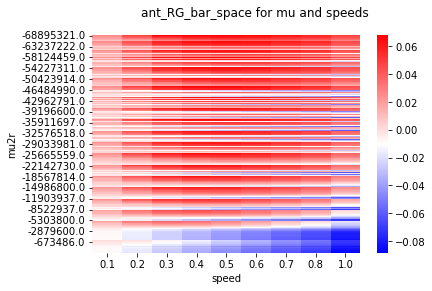

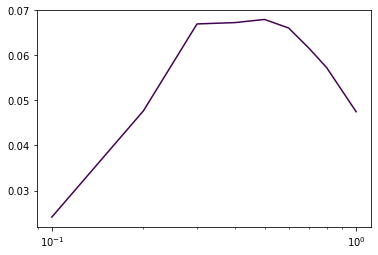

In [8]:
fig = plt.figure()
fig.tight_layout()
fig.suptitle(f'{var} for mu and speeds')


fig2 = plt.figure()
fig2.tight_layout()
#weights = [0.0,10.0,50.0,100.0]

ax = fig.add_subplot(1,1,1)
# plot heatmap for beta
g_heatmap = df.pivot_table(index = 'mu2r',columns = 'speed',values = var, aggfunc = 'mean')
sns.heatmap(g_heatmap, ax = ax, cmap = 'bwr')#,  vmin=-0.2, vmax=0.2)

subg = df.groupby(['mu2r'])
ax = fig2.add_subplot(1,1,1)
ax.set_xscale('log')


# get values for which difference across speed is minimal
diffsdf = pd.DataFrame(columns = ['diff', 'mu','wTOT','tauTOT', 'tauA', 'wBA'])


# get values that yield same anticipation time across speeds

for x,w2 in enumerate(subg.groups):
    sg = subg.get_group(w2)

    ax.plot(sg['speed'], sg[var], label = f'mu = {w2}',color = scalarMap.to_rgba(x))

    diff = np.mean(np.abs(np.diff(sg[var])))
    data = {'diff': diff,
            'mu' : w2,
            'wTOT': sg['wTOT'].min(),
            'tauTOT': sg['tauTOT'].min(),
            'tauA':sg['tauA'],
            'wBA': sg['wBA']}
    diffsdf = diffsdf.append(data, ignore_index = True)



    # if x == len(subg.groups)-100:
    #     plt.scatter(sg['speed'], sg[var], label = f'mu = {w2}',color = 'r', zorder = len(subg.groups))
    #sg.plot( x = 'speed', y = 'ant_RG_drive_space', label =f'wBA = {w2}', ax = ax)


# get mu for minimal difference between speeds
mi= diffsdf['diff'].argmin()
mimu = diffsdf['mu'][mi]
sg = subg.get_group(mimu)
print(mimu)
print(diffsdf.iloc[mi])
ax.scatter(sg['speed'], sg[var], label = f'mu = {w2}',color = 'r', zorder = len(subg.groups))



#get mu for maximal anticipation
ma = df['ant_RG_bar_space'].argmax()
mamu = df['mu2r'][ma]
sg = subg.get_group(mamu)
print(mamu)
print(df.iloc[ma])
ax.scatter(sg['speed'], sg[var], label = f'mu = {w2}',color = 'g', zorder = len(subg.groups))


#fig2.legend()


# fig3 = plt.figure()
# ax = fig3.add_subplot(111)
# ax.scatter(diffsdf.iloc[mi]['wBA'],diffsdf.iloc[mi]['tauA'])


#fig2.legend()


In [9]:
fontsize_legend = 10
fontsize_labels = 15
fontsize_panellabel = 30
fontsize_ticks = 10
lw = 4
ms = 60

panellabel_position = [-0.08, .85]


figsize_ratio = 3
figsize = (16,12)

save = True
save_name = "Figure 1"
show = True
image_format = "png"
dpi = 300


Text(-0.08, 1.1, 'C')

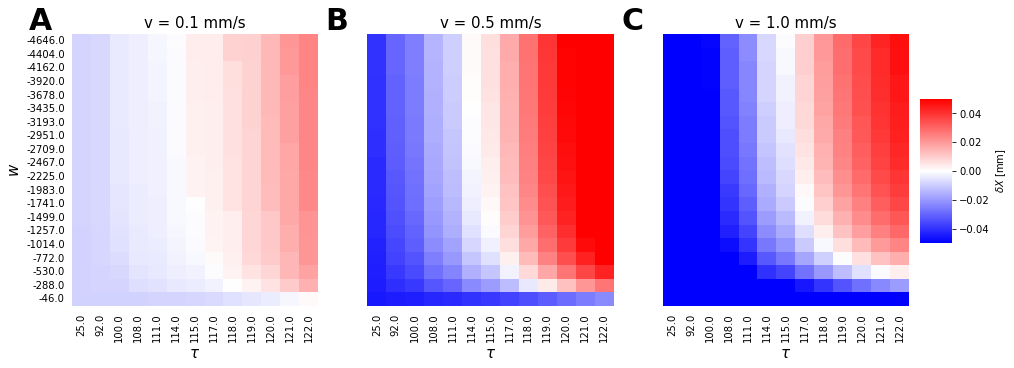

In [10]:

fig = plt.figure(figsize = (15,5))
#fig.suptitle(f'{var}')

cbar_ax = fig.add_axes([.91, .3, .03, .4])

s = 0.1
ax = fig.add_subplot(131)
ax.set_title(f'v = {s} mm/s', fontsize = fontsize_labels)
dfg = df.groupby('speed')
dfs = dfg.get_group(s)

# plot heatmap for beta
g_heatmap = dfs.pivot_table(index = 'wTOT',columns = 'tauTOT',values = var, aggfunc = 'mean')
sns.heatmap(g_heatmap, cmap = 'bwr', ax = ax,  vmin=-0.05, vmax=0.05, cbar=None)
ax.tick_params(left=False, bottom=False)
ax.set_ylabel(r'$w$', fontsize = fontsize_labels)
ax.set_xlabel(r'$\tau$', fontsize = fontsize_labels)
ax.tick_params(labelsize = fontsize_ticks)

ax.text(panellabel_position[0]-0.0,panellabel_position[1]+0.25, "A", transform=ax.transAxes,
       fontsize=fontsize_panellabel, fontweight='bold', va='top', ha='right')

s = 0.5
ax = fig.add_subplot(132)
ax.set_title(f'v = {s} mm/s', fontsize = fontsize_labels)
dfs = dfg.get_group(s)
# plot heatmap for beta
g_heatmap = dfs.pivot_table(index = 'wTOT',columns = 'tauTOT',values = var, aggfunc = 'mean')
sns.heatmap(g_heatmap, cmap = 'bwr', ax = ax,  vmin=-0.05, vmax=0.05, cbar=None, yticklabels=False)
ax.tick_params(left=False, bottom=False)
ax.set_ylabel('')
ax.set_xlabel(r'$\tau$', fontsize = fontsize_labels)
ax.tick_params(labelsize = fontsize_ticks)
 
ax.text(panellabel_position[0]-0.0,panellabel_position[1]+0.25, "B", transform=ax.transAxes,
       fontsize=fontsize_panellabel, fontweight='bold', va='top', ha='right')

s = 1.0
ax = fig.add_subplot(133)
ax.set_title(f'v = {s} mm/s', fontsize = fontsize_labels)
dfs = dfg.get_group(s)

# plot heatmap for beta
g_heatmap = dfs.pivot_table(index = 'wTOT',columns = 'tauTOT',values = var, aggfunc = 'mean')
sns.heatmap(g_heatmap, cmap = 'bwr', ax = ax,  vmin=-0.05, vmax=0.05, yticklabels=False, cbar_ax=cbar_ax,cbar_kws={'label': r'$\delta X$ [mm]'})
ax.tick_params(left=False, bottom=False)
ax.set_ylabel('')
ax.set_xlabel(r'$\tau$', fontsize = fontsize_labels)   
ax.tick_params(labelsize = fontsize_ticks)

ax.text(panellabel_position[0]-0.0,panellabel_position[1]+0.25, "C", transform=ax.transAxes,
       fontsize=fontsize_panellabel, fontweight='bold', va='top', ha='right')


In [8]:
# extract w and tau with good anticipation

